In [4]:
!pip install scikeras


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [7]:
!pip install tensorflow

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

## Read dataset into python

In [9]:
df = pd.read_csv('magic_gamma_telescope04_sample.csv')
df.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [10]:
df['class'].value_counts()

g    2183
h    2104
Name: class, dtype: int64

In [11]:
df.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,57.716420,24.135054,2.849275,0.375352,0.212399,-8.742164,7.314128,0.642312,31.757071,195.702966
std,47.897591,21.823325,0.472802,0.181586,0.110284,66.928938,56.577545,24.176600,27.188376,76.210147
min,7.360600,0.000000,1.991600,0.013100,0.000300,-382.594000,-318.300200,-205.894700,0.000000,5.745600
25%,24.587650,11.904000,2.501100,0.232650,0.126450,-25.685900,-15.003250,-10.895600,7.439800,142.827500
50%,38.875400,17.389500,2.757400,0.352600,0.196000,1.845800,14.907700,1.910700,23.821000,193.740000
75%,75.201750,26.154050,3.131400,0.503000,0.285400,23.421500,34.763650,11.382700,53.004700,242.893700
max,334.177000,256.382000,5.323300,0.893000,0.628300,575.240700,238.321000,179.851000,90.000000,450.953000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   4287 non-null   float64
 1   fwidth    4287 non-null   float64
 2   fsize     4287 non-null   float64
 3   fconc     4287 non-null   float64
 4   fconc1    4287 non-null   float64
 5   fsym      4287 non-null   float64
 6   fm3long   4287 non-null   float64
 7   fm3trans  4287 non-null   float64
 8   falpha    4287 non-null   float64
 9   dist      4287 non-null   float64
 10  class     4287 non-null   object 
dtypes: float64(10), object(1)
memory usage: 368.5+ KB


No null values or type problems

In [16]:
X = df.drop('class', axis=1).values
y = df['class'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

In [18]:
scale = MinMaxScaler()

In [19]:
train_fit = scale.fit(X_train)

In [20]:
X_train = train_fit.transform(X_train)
X_test = train_fit.transform(X_test)

# Label Encoding

In [21]:
le = LabelEncoder()
y_en = le.fit_transform(y)
y_train_en = le.fit_transform(y_train)
y_test_en = le.fit_transform(y_test)

In [22]:
X_train.shape, X_test.shape

((3429, 10), (858, 10))

# Model Evaluation

Building an initial ANN model randomly to assess performance. Using two hidden layers with 16 neurons each.

In [24]:
model = Sequential()

model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [26]:
model.fit(X_train, y_train_en, batch_size=12, epochs=100, 
          validation_data=(X_test, y_test_en), callbacks=[early_stop])

Epoch 1/100
286/286 [==============================] - 5s 9ms/step - loss: 0.6379 - accuracy: 0.6582 - val_loss: 0.5709 - val_accuracy: 0.7646
Epoch 2/100
286/286 [==============================] - 1s 5ms/step - loss: 0.5308 - accuracy: 0.7626 - val_loss: 0.4983 - val_accuracy: 0.7692
Epoch 3/100
286/286 [==============================] - 1s 5ms/step - loss: 0.4878 - accuracy: 0.7737 - val_loss: 0.4801 - val_accuracy: 0.7844
Epoch 4/100
286/286 [==============================] - 1s 5ms/step - loss: 0.4695 - accuracy: 0.7842 - val_loss: 0.4743 - val_accuracy: 0.7844
Epoch 5/100
286/286 [==============================] - 1s 5ms/step - loss: 0.4561 - accuracy: 0.7792 - val_loss: 0.4695 - val_accuracy: 0.7809
Epoch 6/100
286/286 [==============================] - 2s 5ms/step - loss: 0.4483 - accuracy: 0.7819 - val_loss: 0.4509 - val_accuracy: 0.7937
Epoch 7/100
286/286 [==============================] - 1s 5ms/step - loss: 0.4417 - accuracy: 0.7877 - val_loss: 0.4450 - val_accuracy: 0.7949

In [27]:
ann_metrics = pd.DataFrame(model.history.history)
ann_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.637866,0.658209,0.570947,0.764569
1,0.530764,0.762613,0.498332,0.769231
2,0.487789,0.773695,0.480139,0.784382
3,0.469458,0.784194,0.474297,0.784382
4,0.456132,0.779236,0.469494,0.780886
5,0.448308,0.781861,0.450888,0.793706
6,0.441718,0.787693,0.444974,0.794872
7,0.435758,0.793817,0.444631,0.793706
8,0.433161,0.791193,0.440832,0.798368
9,0.430510,0.792651,0.429265,0.793706


# Evaluating Accuracy

<AxesSubplot:>

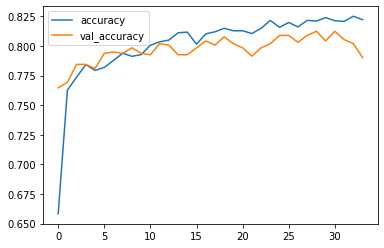

In [29]:
ann_metrics[['accuracy', 'val_accuracy']].plot()

The model has reached limit and would over fit on further epochs. Validation and train loss moving down togther is good indication

In [30]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

27/27 [==============================] - 1s 2ms/step


In [31]:
print(classification_report(y_test_en, predictions))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       461
           1       0.76      0.81      0.78       397

    accuracy                           0.79       858
   macro avg       0.79      0.79      0.79       858
weighted avg       0.79      0.79      0.79       858



In [32]:
confusion_matrix(y_test_en, predictions)

array([[357, 104],
       [ 76, 321]], dtype=int64)

In [33]:
accuracy_score(y_test_en, predictions)

0.7902097902097902

In [34]:
f1_score(y_test_en, predictions)

0.781021897810219

just an initial model gave 79.02% accuracy and 78.10% f-1 score. Initial objectives completed.

# Hyperparameter Tuning

Used grid search with a sklearn wrapper of keras called scikeras

In [36]:
def create_model(neurons, dropout_rate, optimizer='adam'):

	model = Sequential()
	model.add(Dense(neurons, input_shape=(10,), activation='relu'))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, activation='sigmoid'))
 
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [37]:
optimizer = ['SGD', 'RMSprop', 'Adam']
dropout_rate = [0.2, 0.3, 0.4, 0.5]
neurons = [15, 20, 25, 30]

param_grid = dict(model__optimizer=optimizer, model__dropout_rate=dropout_rate, 
                  model__neurons=neurons)

In [38]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y_en)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
